# Kernspinresonanz

## initial imports

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as con
import uncertainties as un
import uncertainties.unumpy as unp
from scipy.signal import find_peaks,find_peaks_cwt
import scipy.signal as sig
import scipy.special as sp
import scienceplots
plt.figure()
plt.style.use('science')
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams['text.usetex'] = False # disable latex
plt.rcParams['figure.dpi'] = 150
import os
import fp

<Figure size 640x480 with 0 Axes>

In [2]:
#aliases
from uncertainties import ufloat as uf
from uncertainties.unumpy import uarray as ua
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd

In [3]:
# unceratianty from sum
def uavg(x):
    return uf(np.average(x),np.std(x))
def colorbar(vmin=0, vmax=1, label='', colormap='jet'):
    """Creates a colorbar with the given vmin and vmax values"""
    return plt.colorbar(plt.cm.ScalarMappable(norm=col.Normalize( vmin=vmin,vmax=vmax), cmap=colormap), label=label)

In [4]:
outdir = f'plots/kernspin/'
datadir = f'data/kernspin/'
os.makedirs(outdir, exist_ok=True)

In [5]:
files = []
for i in [2,3,4,5,7,8,9,10,12]:
    f = !ls {datadir}{i}/*/*.txt
    # print(f)
    files.append(f)
data = []
for i, subfile in enumerate(files):
    dat = []
    for f in subfile:
        # print(f)
        dat.append(pd.read_csv(f, header=None,))
    data.append(dat)

## Part 2

In [6]:
files2= files[0]
dat2 = data[0]
files2

['data/kernspin/2/FirstFID/fid.txt', 'data/kernspin/2/FirstFID/spectrum.txt']

2006 12604.06972620225


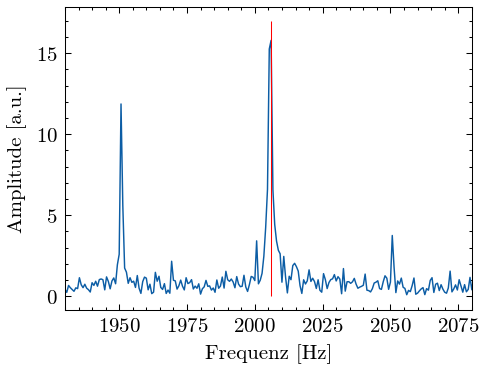

In [7]:
plt.figure()
d = dat2[1]
plt.plot(d[0], d[1],lw=0.7)

f_lamor = 2006
w_lamor = 2*np.pi*f_lamor
print(f_lamor,w_lamor)
plt.vlines(f_lamor, 0, 17, color='r',lw=0.5)

plt.xlim(1930,2080)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude [a.u.]')
plt.savefig(outdir+'2-lamor.pdf')

## Part 3

In [8]:
files3= files[1]
dat3 = data[1]
files3

['data/kernspin/3/Noise_Background/fid.txt',
 'data/kernspin/3/Noise_Background/spectrum.txt',
 'data/kernspin/3/Noise_Water/fid.txt',
 'data/kernspin/3/Noise_Water/spectrum.txt']

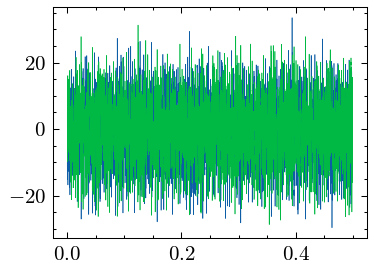

In [9]:
plt.figure(figsize=(2.7,2))
d=dat3[0]
plt.plot(d[0], d[1],lw=0.3)
d=dat3[2]
plt.plot(d[0], d[1],lw=0.3)

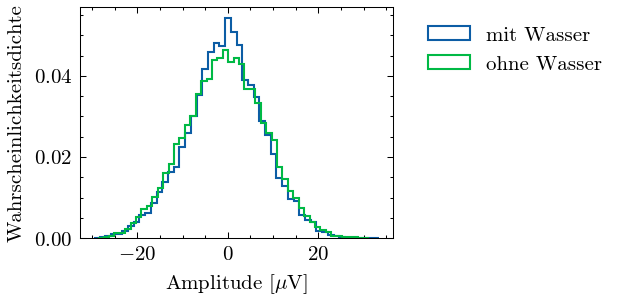

In [10]:
# fig, ax = plt.subplots(2,1,figsize=(4,3), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05})
# short
plt.figure(figsize=(2.7,2))
d=dat3[0]
plt.hist(d[1],bins=50,density=True, histtype='step', label='mit Wasser')
d=dat3[0]
d=dat3[2]
plt.hist(d[1],bins=50,density=True, histtype='step', label='ohne Wasser')

# ax[i].set_xlim(0,4000)
plt.ylabel('Wahrscheinlichkeitsdichte')

plt.xlabel('Amplitude [$\mu$V]')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.savefig(outdir+'3-hist.pdf')

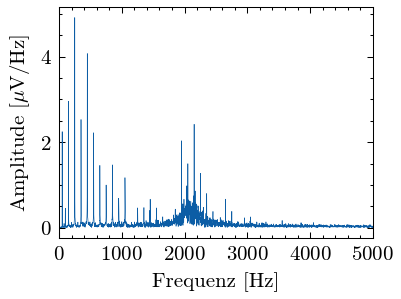

In [11]:
# background
plt.figure(figsize=(2.7,2))
d=dat3[1]
plt.plot(d[0], d[1],lw=0.3)
plt.xlim(0,5000)

plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude [$\mu$V/Hz]')
plt.savefig(outdir+'3-background_noise.pdf')

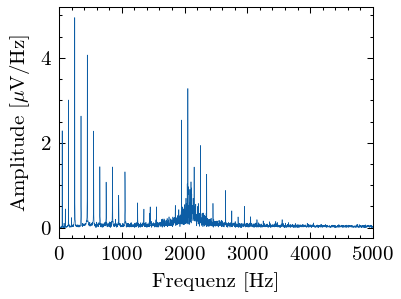

In [12]:
# water
plt.figure(figsize=(2.7,2))
d=dat3[3]
plt.plot(d[0], d[1],lw=0.3)
plt.xlim(0,5000)

plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude [$\mu$V/Hz]')
plt.savefig(outdir+'3-water_noise.pdf')

## Part 4

In [13]:
files4= files[2]
dat4 = data[2]
freq_cap = dat4[1::3]
files4

['data/kernspin/4/no_water/fid.txt',
 'data/kernspin/4/no_water/freq-cap.txt',
 'data/kernspin/4/no_water/spectrum.txt',
 'data/kernspin/4/water/fid.txt',
 'data/kernspin/4/water/freq-cap.txt',
 'data/kernspin/4/water/spectrum.txt']

In [14]:
freq_cap[0]

,0,1
0,4.40,2655.21
1,4.45,2645.23
2,4.50,2635.25
3,4.55,2635.25
4,4.60,2625.28
...,...,...
251,16.95,1697.34
252,17.00,1697.34
253,17.05,1687.36
254,17.10,1687.36


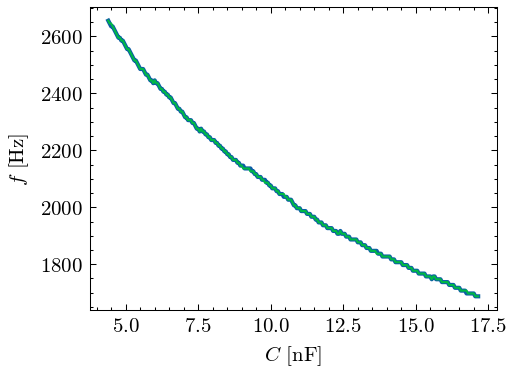

In [15]:
plt.figure()
for fc, lw in zip(freq_cap,[2,1]):
    plt.plot(fc[0], fc[1],lw=lw)

plt.ylabel('$f$ [Hz]')
plt.xlabel('$C$ [nF]')
plt.savefig(outdir+'4-comparison.pdf')

In [16]:
def fc_fit_theo(C, L):
    return 1/(2*np.pi*np.sqrt(L*C))

def fc_fit(C, L, C0):
    return 1/(2*np.pi*np.sqrt(L*(C+C0)))

def fc_fit_inv(f, L, C0):
    return 1/(4*np.pi**2*L*f**2) - C0

/home/emil/Documents/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[6.27355726e-10] [5.13791106e-12]


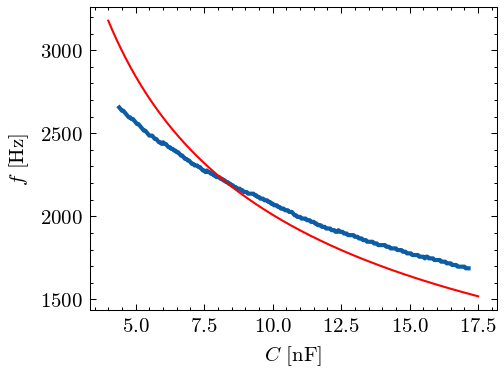

In [17]:
plt.figure()
d = freq_cap[0]
plt.plot(d[0], d[1],lw=2)
popt, pcov = curve_fit(fc_fit_theo, d[0], d[1], p0=[1e-6])
xl = np.linspace(4, 17.5, 500)
plt.plot(xl, fc_fit_theo(xl, *popt), 'r-', label='fit')
print(popt, np.sqrt(np.diag(pcov)))
plt.ylabel('$f$ [Hz]')
plt.xlabel('$C$ [nF]')
plt.savefig(outdir+'4-no_water-theo_fit.pdf')

/home/emil/Documents/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[4.15922384e-10 4.24094437e+00] [5.51977639e-13 1.68544619e-02]


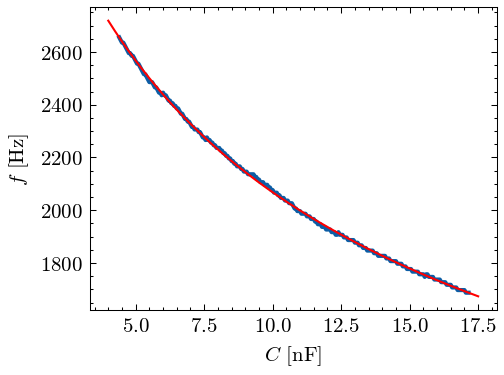

In [18]:
plt.figure()
d = freq_cap[0]
plt.plot(d[0], d[1],lw=2)
popt, pcov = curve_fit(fc_fit, d[0], d[1], p0=[1e-6,0])
xl = np.linspace(4, 17.5, 500)
plt.plot(xl, fc_fit(xl, *popt), 'r-', label='fit')
print(popt, np.sqrt(np.diag(pcov)))
plt.ylabel('$f$ [Hz]')
plt.xlabel('$C$ [nF]')
plt.savefig(outdir+'4-no_water-fit.pdf')

/home/emil/Documents/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[6.27371962e-10] [5.13387197e-12]


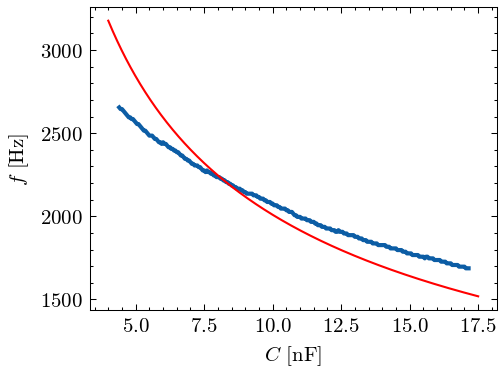

In [19]:
plt.figure()
d = freq_cap[1]
plt.plot(d[0], d[1],lw=2)
popt, pcov = curve_fit(fc_fit_theo, d[0], d[1], p0=[1e-6])
xl = np.linspace(4, 17.5, 500)
plt.plot(xl, fc_fit_theo(xl, *popt), 'r-', label='fit')
print(popt, np.sqrt(np.diag(pcov)))
plt.ylabel('$f$ [Hz]')
plt.xlabel('$C$ [nF]')
plt.savefig(outdir+'4-water-theo_fit.pdf')

/home/emil/Documents/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[4.16066189e-10 4.23683526e+00] [5.43516250e-13 1.65841313e-02]
L=416.1 \pm 0.5 H, C0=4.237 \pm 0.017nF
C_L = 10.892 \pm 0.026 nF
\delta C = 0.04980468749999999 nF


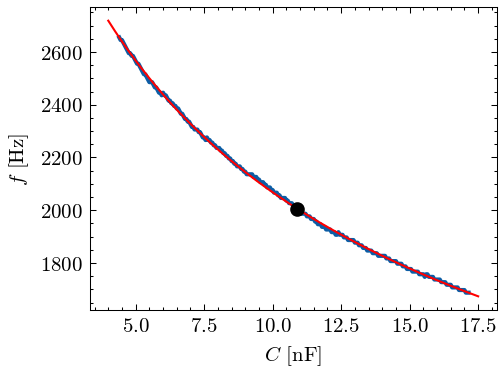

In [20]:
plt.figure()
d = freq_cap[1]
plt.plot(d[0], d[1],lw=2)
popt, pcov = curve_fit(fc_fit, d[0], d[1], p0=[1e-6,0])
xl = np.linspace(4, 17.5, 500)
plt.plot(xl, fc_fit(xl, *popt), 'r-', label='fit')
print(popt, np.sqrt(np.diag(pcov)))
print(f"L={uf(popt[0],np.sqrt(np.diag(pcov))[0])*1e12:L} H, C0={uf(popt[1],np.sqrt(np.diag(pcov))[1]):L}nF")
plt.scatter(fc_fit_inv(f_lamor, *popt), f_lamor ,marker='o',color='k',zorder=10)
# print(f"C_L = {fc_fit_inv(f_lamor, *popt)} nF")
cov = np.sqrt(np.diag(pcov))
print(f"C_L = {fc_fit_inv(f_lamor, uf(popt[0],cov[0]), uf(popt[1],cov[1])):L} nF")
plt.ylabel('$f$ [Hz]')
plt.xlabel('$C$ [nF]')

print(f"\delta C = {(np.max(d[0])-np.min(d[0]))/len(d[0])} nF")

plt.savefig(outdir+'4-water-fit.pdf')

## Part 5

In [21]:
files5= files[3]
dat5 = data[3]
files5

['data/kernspin/5/AutoShim/fid.txt',
 'data/kernspin/5/AutoShim/iteration.txt',
 'data/kernspin/5/AutoShim/spectrum.txt',
 'data/kernspin/5/B1DurationFast/ampl-b1.txt',
 'data/kernspin/5/C_opt_1/fid.txt',
 'data/kernspin/5/C_opt_1/spectrum.txt',
 'data/kernspin/5/C_opt_2/fid.txt',
 'data/kernspin/5/C_opt_2/spectrum.txt',
 'data/kernspin/5/C_opt_3/fid.txt',
 'data/kernspin/5/C_opt_3/spectrum.txt',
 'data/kernspin/5/FID/fid.txt',
 'data/kernspin/5/FID/spectrum.txt']

In [22]:
files5[5:-1:2]

['data/kernspin/5/C_opt_1/spectrum.txt',
 'data/kernspin/5/C_opt_2/spectrum.txt',
 'data/kernspin/5/C_opt_3/spectrum.txt']

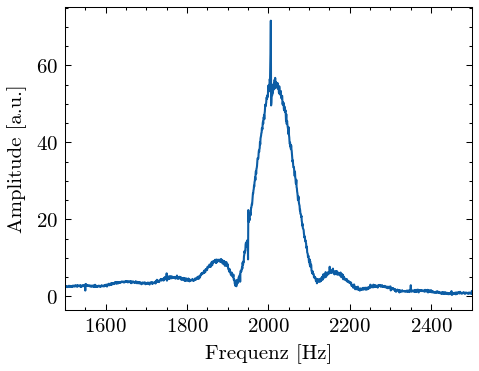

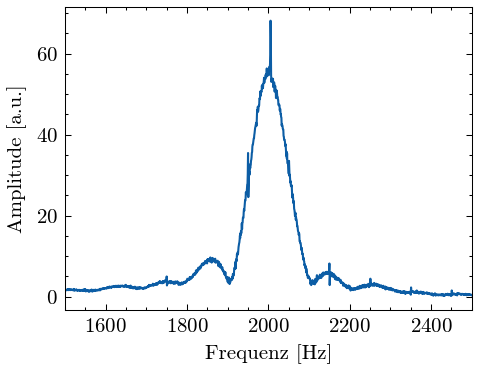

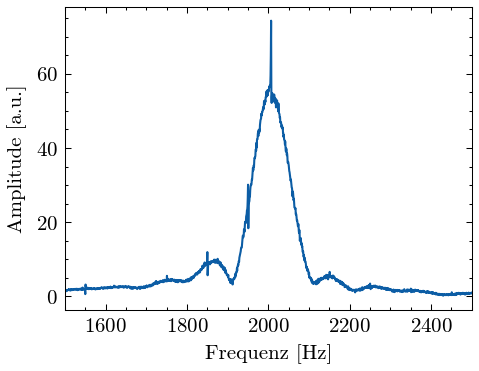

In [23]:
for i, d in enumerate(dat5[5:-1:2]):
    plt.figure()
    # C_opt_3
    # d= dat5[9]
    plt.plot(d[0], d[1])
    plt.xlim(1500,2500)

    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('Amplitude [a.u.]')
    plt.savefig(outdir+f'5-c-opt-{i+1}.pdf')

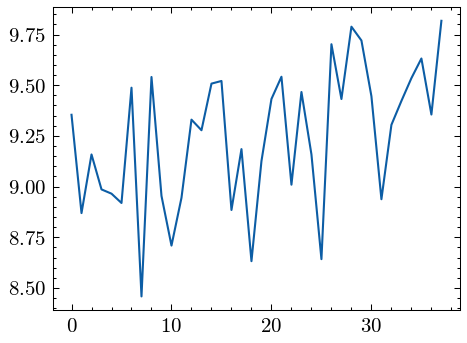

In [24]:
plt.figure()
d= dat5[1]
plt.plot(d[0], d[1])

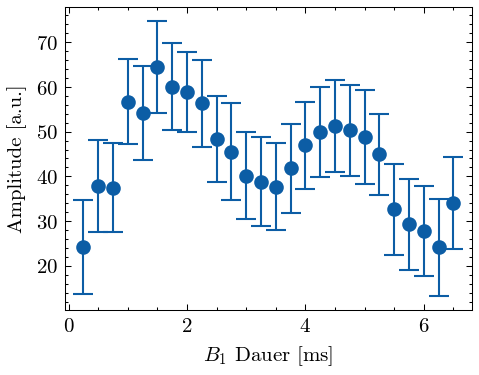

In [25]:
plt.figure()
d= dat5[3]
plt.errorbar(d[0], d[1],d[2],fmt='o')
plt.xlabel('$B_1$ Dauer [ms]')
plt.ylabel('Amplitude [a.u.]')
plt.savefig(outdir+'5-b1_duration.pdf')


## Part 7

In [26]:
files7= files[4]
dat7 = data[4]
files7

['data/kernspin/7/FID_long/fid.txt',
 'data/kernspin/7/FID_long/spectrum.txt',
 'data/kernspin/7/FID_short/fid.txt',
 'data/kernspin/7/FID_short/spectrum.txt']

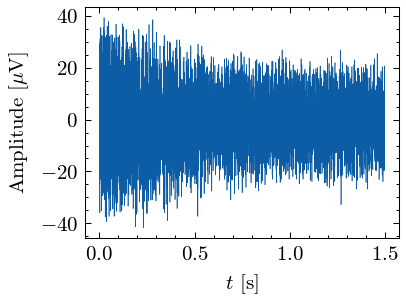

In [27]:
# fig, ax = plt.subplots(2,1,figsize=(4,3), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05})
# short
plt.figure(figsize=(2.7,2))
d= dat7[2]
plt.plot(d[0], d[1],lw=0.3)
# ax[i].set_xlim(0,4000)
plt.ylabel('Amplitude [$\mu$V]')

plt.xlabel('$t$ [s]')
plt.savefig(outdir+'7-fid-short.pdf')

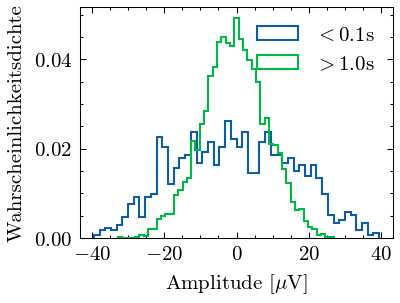

In [28]:
# fig, ax = plt.subplots(2,1,figsize=(4,3), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05})
# short
plt.figure(figsize=(2.7,2))
d= dat7[2]
a = len(d[1])/ max(d[0])
# plt.plot(d[0][a:], d[1][a:],lw=0.3)
plt.hist(d[1][:int(a*0.1)],bins=50,density=True, histtype='step', label='$< 0.1$s')
plt.hist(d[1][int(a):],bins=50,density=True, histtype='step', label='$> 1.0$s')

# ax[i].set_xlim(0,4000)
plt.ylabel('Wahrscheinlichkeitsdichte')

plt.xlabel('Amplitude [$\mu$V]')
plt.legend()

plt.savefig(outdir+'7-hist-short.pdf')

7.474541055962394


(1.0, 1.05)

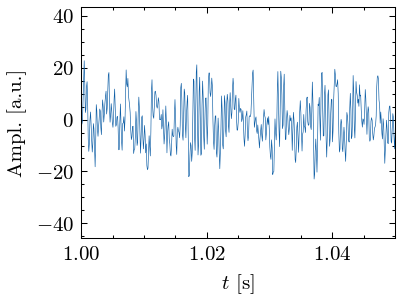

In [29]:
# fig, ax = plt.subplots(2,1,figsize=(4,3), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05})
# short
plt.figure(figsize=(2.7,2))
d= dat7[2]
plt.plot(d[0], d[1],lw=0.3)
# ax[i].set_xlim(0,4000)
plt.ylabel('Ampl. [a.u.]')

plt.xlabel('$t$ [s]')

# calculate signal to noise ratio
# noise
noise = np.std(d[1])
# signal
signal = np.max(d[1]) - np.min(d[1])
print(signal/noise)

plt.xlim(1,1.05)
# plt.savefig(outdir+'7-fid-short.pdf')

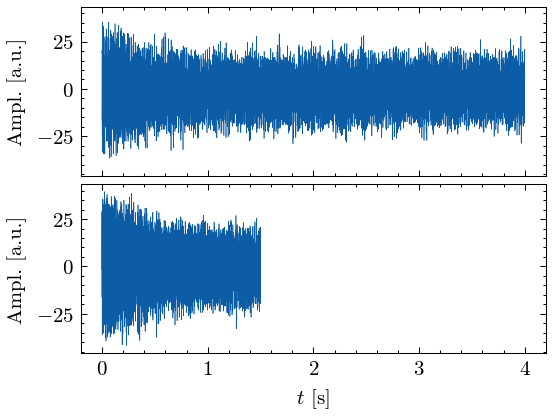

In [30]:
fig, ax = plt.subplots(2,1,figsize=(4,3), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05})
# long
for i, d in enumerate(dat7[::2]):
    ax[i].plot(d[0], d[1],lw=0.3)
    # ax[i].set_xlim(0,4000)
    ax[i].set_ylabel('Ampl. [a.u.]')

ax[1].set_xlabel('$t$ [s]')
plt.savefig(outdir+'7-fid.pdf')

In [31]:
def lb_fit(x, x0, A, B):
    return 2*A/np.pi * B/ (4*(x-x0)**2 + B**2)

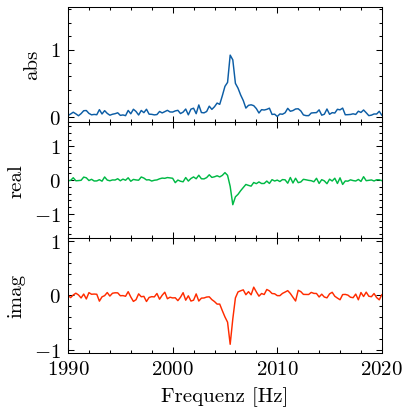

In [32]:
fig, ax = plt.subplots(3,1,sharex=True,figsize=(2.7,3),gridspec_kw={'hspace': 0})
d = dat7[0]
dft = np.fft.fftshift(np.fft.fft(d[1]))
freq = np.fft.fftshift(np.fft.fftfreq(len(d[1]),d[0][1]-d[0][0]))
ax[0].plot(freq, np.abs(dft)/25000,lw=0.7,color='C0')
ax[0].set_ylabel('abs')
ax[1].plot(freq, np.real(dft)/25000,lw=0.7,color='C1')
ax[1].set_ylabel('real')
ax[2].plot(freq, np.imag(dft)/25000,lw=0.7,color='C3')
ax[2].set_ylabel('imag')
ax[0].set_xlim(1990,2020)
ax[2].set_xlabel('Frequenz [Hz]')
plt.savefig(outdir+'7-long-fft.pdf')

[2.00643212e+03 5.83118360e+00 1.84025253e+00] [0.04606352 0.30012002 0.13729646]
x0=2006.43 \pm 0.05 Hz
B=1.84 \pm 0.14 Hz
A = 5.83 \pm 0.30
Area=A*25000=146 \pm 8 * 1e3


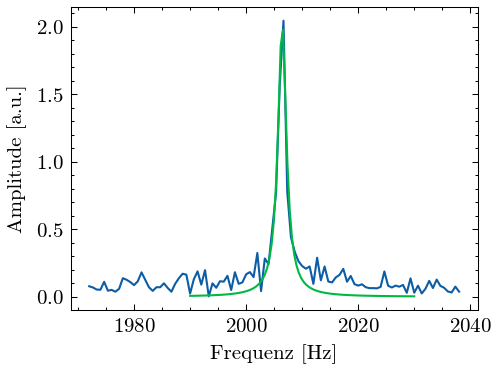

In [33]:
# fig, ax = plt.subplots(3,1,sharex=True,figsize=(2.7,3),gridspec_kw={'hspace': 0})
plt.figure()
d = dat7[2]
dft = np.fft.fftshift(np.fft.fft(d[1]))[11150:11250]
freq = np.fft.fftshift(np.fft.fftfreq(len(d[1]),d[0][1]-d[0][0]))[11150:11250]
plt.plot(freq, np.abs(dft)/25000)

fl = np.linspace(1990,2030,100)
# plt.plot(fl, lb_fit(fl, 2006.5, 6, 2*np.pi*0.3))

popt, pcov = curve_fit(lb_fit, freq, np.abs(dft)/25000, p0=[2006.5, 6, 2*np.pi*0.3])
plt.plot(fl, lb_fit(fl, *popt))
print(popt, np.sqrt(np.diag(pcov)))
print(f"x0={uf(popt[0],np.sqrt(np.diag(pcov))[0]):L} Hz")
print(f"B={uf(popt[2],np.sqrt(np.diag(pcov))[2]):L} Hz")
print(f"A = {uf(popt[1],np.sqrt(np.diag(pcov))[1]):L}")
print(f"Area=A*25000={uf(popt[1],np.sqrt(np.diag(pcov))[1])*25:L} * 1e3")

# plt.vlines(f_lamor, 0, 2, color='k',lw=0.5,ls='--')
# plt.xlim(1990,2020)

plt.ylabel('Amplitude [a.u.]')
plt.xlabel('Frequenz [Hz]')
plt.savefig(outdir+'7-short-fit.pdf')

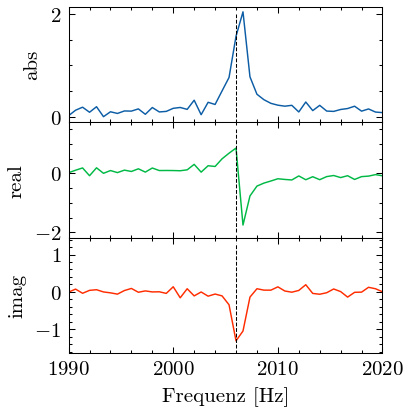

In [34]:
fig, ax = plt.subplots(3,1,sharex=True,figsize=(2.7,3),gridspec_kw={'hspace': 0})
d = dat7[2]
dft = np.fft.fftshift(np.fft.fft(d[1]))
freq = np.fft.fftshift(np.fft.fftfreq(len(d[1]),d[0][1]-d[0][0]))
ax[0].plot(freq, np.abs(dft)/25000,lw=0.7,color='C0')
ax[0].set_ylabel('abs')
ax[0].vlines(f_lamor, 0, 2, color='k',lw=0.5,ls='--')

# linienbreite un integral

ax[1].plot(freq, np.real(dft)/25000,lw=0.7,color='C1')
ax[1].vlines(f_lamor, -2, 1.5, color='k',lw=0.5,ls='--')

ax[1].set_ylabel('real')

ax[2].plot(freq, np.imag(dft)/25000,lw=0.7,color='C3')
ax[2].vlines(f_lamor, -1.5, 1.3, color='k',lw=0.5,ls='--')

ax[2].set_ylabel('imag')
ax[0].set_xlim(1990,2020)
ax[2].set_xlabel('Frequenz [Hz]')
plt.savefig(outdir+'7-short-fft.pdf')

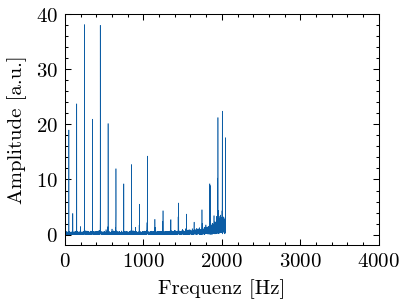

In [35]:
plt.figure(figsize=(2.7,2))
# long
d=dat7[1]
plt.plot(d[0], d[1],lw=0.3)
plt.xlim(0,4000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude [a.u.]')
plt.savefig(outdir+'7-long-spectrum.pdf')

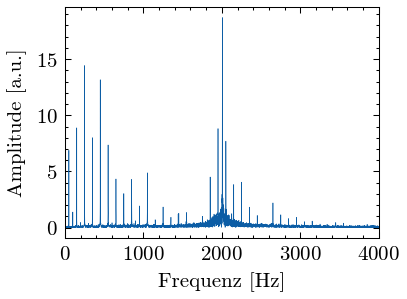

In [36]:
plt.figure(figsize=(2.7,2))
# short
d=dat7[3]
plt.plot(d[0], d[1],lw=0.3)
plt.xlim(0,4000)

plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude [a.u.]')
plt.savefig(outdir+'7-short-spectrum.pdf')

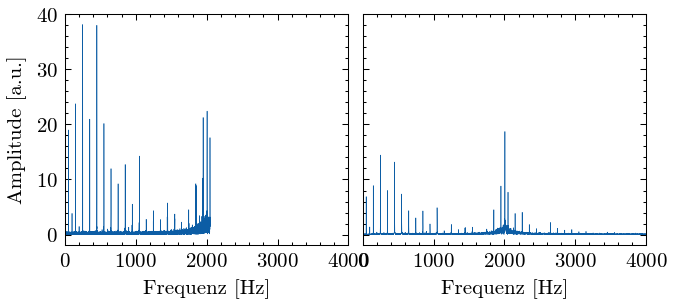

In [37]:
fig, ax = plt.subplots(1,2,figsize=(5,2), sharey=True, gridspec_kw={'wspace': 0.05})
# long
for i, d in enumerate(dat7[1::2]):
    ax[i].plot(d[0], d[1],lw=0.3)
    ax[i].set_xlim(0,4000)
    ax[i].set_xlabel('Frequenz [Hz]')
ax[0].set_ylabel('Amplitude [a.u.]')
plt.savefig(outdir+'7-spectrum.pdf')

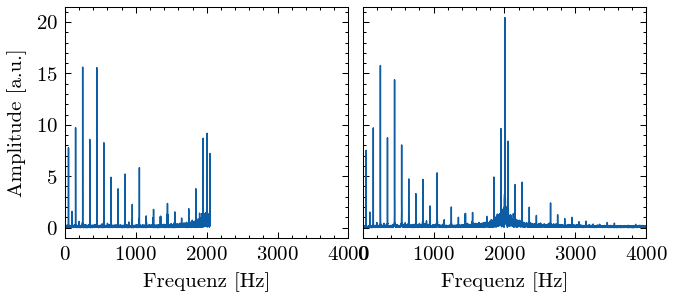

In [38]:
fig, ax = plt.subplots(1,2,figsize=(5,2), sharey=True, gridspec_kw={'wspace': 0.05})
# long
for i, d in enumerate(dat7[0::2]):
    dft = np.fft.fftshift(np.fft.fft(d[1]))
    freq = np.fft.fftshift(np.fft.fftfreq(len(d[1]),d[0][1]-d[0][0]))
    # ax[i].plot(d[0], d[1],lw=0.3)
    ax[i].plot(freq, np.abs(dft)/2500,lw=0.7,color='C0')
    ax[i].set_xlim(0,4000)
    ax[i].set_xlabel('Frequenz [Hz]')
ax[0].set_ylabel('Amplitude [a.u.]')
plt.savefig(outdir+'7-spectrum-alt.pdf')

## Part 8

In [39]:
files8= files[5]
dat8 = data[5]
files8

['data/kernspin/8/T1-Bp-long/data.txt',
 'data/kernspin/8/T1-Bp-long/t1_fit.txt',
 'data/kernspin/8/T1-Bp-long/t1.txt',
 'data/kernspin/8/T1-Bp-short/data.txt',
 'data/kernspin/8/T1-Bp-short/T1_fit.txt',
 'data/kernspin/8/T1-Bp-short/T1.txt',
 'data/kernspin/8/T1-Bp-short/test.txt']

In [40]:
def t1_fit(t, T1):
    return 1- np.exp(-t/T1) 

\SI{2.02 \pm 0.07}{\s}


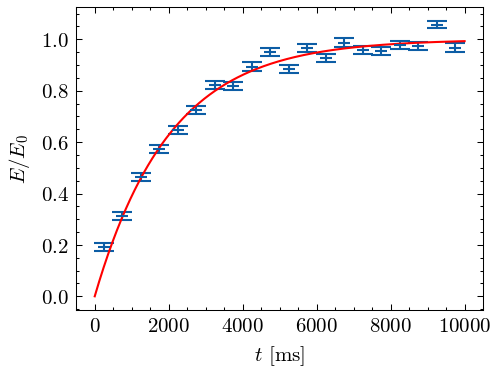

In [41]:
plt.figure()
d = dat8[2]
plt.errorbar(d[0],d[1],2*d[2],fmt='_')
popt, pcov = curve_fit(t1_fit, d[0], d[1], p0=[2000],sigma=2*d[2])
xl = np.linspace(0, 10000, 500)

t1= uf(popt[0],np.sqrt(np.diag(pcov))[0])
print(f"\SI{{{t1*1e-3:L}}}{{\s}}")

plt.plot(xl, t1_fit(xl, *popt), 'r-', label='fit')

plt.xlabel('$t$ [ms]')
plt.ylabel('$E/E_0$')
plt.savefig(outdir+'8-t1.pdf')


## Part 9

In [42]:
files9= !ls {datadir}9/*/spin-echo-results.txt
dat9=[]
for f in files9:
    dat9.append(pd.read_csv(f,sep='\s+'))
files9


['data/kernspin/9/Echo-higher-x/spin-echo-results.txt',
 'data/kernspin/9/Echo-lower-x/spin-echo-results.txt',
 'data/kernspin/9/Echo-optimal/spin-echo-results.txt']

In [43]:
i = 0
uavg(dat9[i]['Max']),uavg(dat9[i]['Integral'])

(1.788888888888889+/-0.5704665623552638,
 10.388888888888891+/-1.6168862012072218)

In [44]:

def print_spin_echo_table(i):
    print(r"\begin{tabular}{|l|l|}")
    print(r"\hline")
    print(r"\textbf{Amplitude} & \textbf{Integral} \\ \hline")
    d = dat9[i]
    for amp, integ in zip(d['Max'],d['Integral']):
        print(fr'\num{{{amp}}} & \num{{{integ}}} \\ \hline')
    print(r"\hline")
    print(fr"\num{{{uavg(d['Max']):L}}} &\num{{{uavg(d['Integral']):L}}} \\ \hline")
    print(r"\end{tabular}")
#higher
print_spin_echo_table(0)

\begin{tabular}{|l|l|}
\hline
\textbf{Amplitude} & \textbf{Integral} \\ \hline
\num{3.1} & \num{14.2} \\ \hline
\num{2.4} & \num{10.9} \\ \hline
\num{1.9} & \num{10.1} \\ \hline
\num{1.7} & \num{10.9} \\ \hline
\num{1.6} & \num{10.3} \\ \hline
\num{1.4} & \num{8.4} \\ \hline
\num{1.4} & \num{8.3} \\ \hline
\num{1.3} & \num{10.2} \\ \hline
\num{1.3} & \num{10.2} \\ \hline
\hline
\num{1.8 \pm 0.6} &\num{10.4 \pm 1.6} \\ \hline
\end{tabular}


In [45]:
#lower
print_spin_echo_table(1)

\begin{tabular}{|l|l|}
\hline
\textbf{Amplitude} & \textbf{Integral} \\ \hline
\num{2.5} & \num{11.8} \\ \hline
\num{1.8} & \num{9.4} \\ \hline
\num{1.6} & \num{8.1} \\ \hline
\num{1.4} & \num{7.6} \\ \hline
\num{1.3} & \num{7.3} \\ \hline
\num{1.2} & \num{7.1} \\ \hline
\num{1.1} & \num{7.9} \\ \hline
\num{1.2} & \num{8.2} \\ \hline
\num{1.3} & \num{8.3} \\ \hline
\hline
\num{1.5 \pm 0.4} &\num{8.4 \pm 1.4} \\ \hline
\end{tabular}


In [46]:
#optimal
print_spin_echo_table(2)

\begin{tabular}{|l|l|}
\hline
\textbf{Amplitude} & \textbf{Integral} \\ \hline
\num{16.2} & \num{24.9} \\ \hline
\num{16.1} & \num{22.5} \\ \hline
\num{15.4} & \num{22.0} \\ \hline
\num{14.6} & \num{21.8} \\ \hline
\num{14.3} & \num{20.5} \\ \hline
\num{13.5} & \num{19.6} \\ \hline
\num{12.4} & \num{18.7} \\ \hline
\num{10.8} & \num{18.4} \\ \hline
\num{9.6} & \num{18.7} \\ \hline
\hline
\num{13.7 \pm 2.2} &\num{20.8 \pm 2.1} \\ \hline
\end{tabular}


## Part 10

In [47]:
files10= files[7]
dat10 = data[7]
t2_10 = dat10[3::4]
alpha = [0,0,0,180,90,90]
beta =  [0,180,90,0,0,270]
files10[3::8]

['data/kernspin/10/CPMG-0-0-alternating/t2.txt',
 'data/kernspin/10/CPMG-0-180-alternating/t2.txt',
 'data/kernspin/10/CPMG-0-90-alternating/t2.txt',
 'data/kernspin/10/CPMG-180-0-alternating/t2.txt',
 'data/kernspin/10/CPMG-90-0-alternating/t2.txt',
 'data/kernspin/10/CPMG-90-270-alternating/t2.txt']

In [48]:
def t2_fit(t, T2):
    return np.exp(-t/T2)

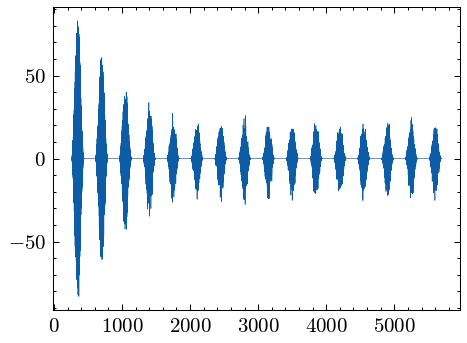

In [49]:
files10[1::8]
d= dat10[17]
plt.plot(d[0], d[1],lw=0.3)

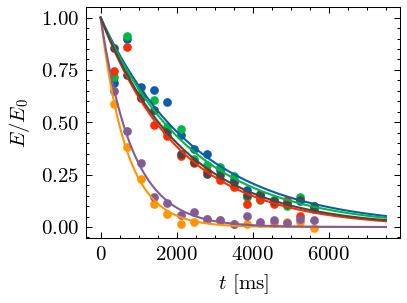

In [50]:
plt.figure(figsize=(2.7,2))
t2_alt = []
for i, t2 in enumerate(t2_10[::2]):
    # amp = ua(t2[1],t2[2])
    # plt.title('alternating')
    plt.scatter(t2[0],t2[1],s=10, label=rf"${alpha[i]}\degree, {beta[i]}\degree$")
    popt, pcov = curve_fit(t2_fit, t2[0], t2[1], p0=[1000])
    xl = np.linspace(0, 7500, 500)
    plt.plot(xl, t2_fit(xl, *popt))
    t2_alt.append(uf(popt[0],np.sqrt(np.diag(pcov))[0]))
    # plt.legend()
    plt.xlabel('$t$ [ms]')
    plt.ylabel('$E/E_0$')
plt.savefig(outdir+'10-t2-alt.pdf')


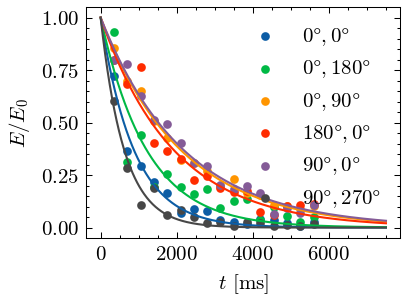

In [51]:
plt.figure(figsize=(2.7,2))
t2_const = []
for i, t2 in enumerate(t2_10[1::2]):
    # amp = ua(t2[1],t2[2])
    # plt.title('constant')
    plt.scatter(t2[0],t2[1],s=10, label=rf"${alpha[i]}\degree, {beta[i]}\degree$")
    popt, pcov = curve_fit(t2_fit, t2[0], t2[1], p0=[1000])
    xl = np.linspace(0, 7500, 500)
    plt.plot(xl, t2_fit(xl, *popt))
    t2_const.append(uf(popt[0],np.sqrt(np.diag(pcov))[0]))
    plt.legend()
    plt.xlabel('$t$ [ms]')
    plt.ylabel('$E/E_0$')
# 180,0 wirklich mit den parametern>
plt.savefig(outdir+'10-t2-const.pdf')


In [52]:
print(r"\begin{tabular}{|l|l|l|l|}")
print(r"\hline")
print(r"$\mathbf{\alpha}$ & $\mathbf{\beta}$   & \textbf{alternierend} & \textbf{konstant} \\ \hline")
for a, b, alt, const in zip(alpha, beta, t2_alt, t2_const):
    print(fr'{a} & {b} & \SI{{{alt*1e-3:L}}}{{\s}} & \SI{{{const*1e-3:L}}}{{\s}}  \\ \hline')
print(r"\end{tabular}")

\begin{tabular}{|l|l|l|l|}
\hline
$\mathbf{\alpha}$ & $\mathbf{\beta}$   & \textbf{alternierend} & \textbf{konstant} \\ \hline
0 & 0 & \SI{2.54 \pm 0.15}{\s} & \SI{0.88 \pm 0.04}{\s}  \\ \hline
0 & 180 & \SI{2.40 \pm 0.13}{\s} & \SI{1.21 \pm 0.13}{\s}  \\ \hline
0 & 90 & \SI{0.684 \pm 0.018}{\s} & \SI{2.11 \pm 0.04}{\s}  \\ \hline
180 & 0 & \SI{2.09 \pm 0.09}{\s} & \SI{1.93 \pm 0.10}{\s}  \\ \hline
90 & 0 & \SI{0.838 \pm 0.028}{\s} & \SI{2.19 \pm 0.06}{\s}  \\ \hline
90 & 270 & \SI{2.19 \pm 0.04}{\s} & \SI{0.624 \pm 0.035}{\s}  \\ \hline
\end{tabular}


## Part 11

In [53]:
files11 = !ls {datadir}/11/*/*.txt
for f in files11[1::7]+files11[3::7]+files11[5::7]:
    files11.remove(f)
files11=files11[8:]+ files11[:8]
files11

['data/kernspin//11/250uM_FID/fid.txt',
 'data/kernspin//11/250uM_FID/spectrum.txt',
 'data/kernspin//11/250uM_T1-Bp/t1.txt',
 'data/kernspin//11/250uM_T2/t2.txt',
 'data/kernspin//11/500uM_FID/fid.txt',
 'data/kernspin//11/500uM_FID/spectrum.txt',
 'data/kernspin//11/500uM_T1-Bp/t1.txt',
 'data/kernspin//11/500uM_T2/t2.txt',
 'data/kernspin//11/1000uM_FID/fid.txt',
 'data/kernspin//11/1000uM_FID/spectrum.txt',
 'data/kernspin//11/1000uM_T1-Bp/t1.txt',
 'data/kernspin//11/1000uM_T2/t2.txt',
 'data/kernspin//11/2000uM_FID/fid.txt',
 'data/kernspin//11/2000uM_FID/spectrum.txt',
 'data/kernspin//11/2000uM_T1-Bp/t1.txt',
 'data/kernspin//11/2000uM_T2/t2.txt']

In [54]:
concentrations = [250,500,1000,2000]

In [55]:
dat11 = []
for i, f in enumerate(files11):
    dat11.append(pd.read_csv(f, header=None,))

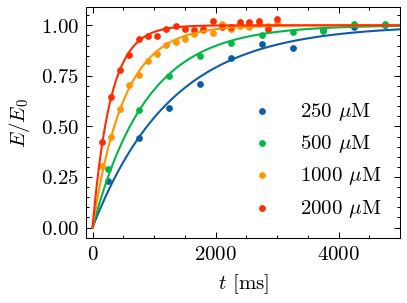

In [56]:
# t1
plt.figure(figsize=(2.7,2))
t1_11 = []
for d ,c in zip(dat11[2::4], concentrations):
    plt.scatter(d[0],d[1],s=5, label=rf"{c} $\mu$M")
    popt, pcov = curve_fit(t1_fit, d[0], d[1], p0=[2000],sigma=2*d[2])
    xl = np.linspace(0, 5000, 500)
    plt.plot(xl, t1_fit(xl, *popt))
    t1_11.append(uf(popt[0],np.sqrt(np.diag(pcov))[0]))
plt.xlabel('$t$ [ms]')
plt.ylabel('$E/E_0$')
plt.legend()
plt.xlim(-100,5000)
plt.savefig(outdir+'11-t1.pdf')

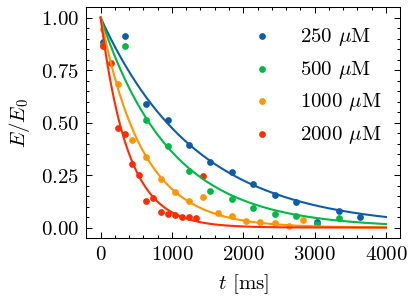

In [57]:
# t2
plt.figure(figsize=(2.7,2))
t2_11 = []
for d,c in zip(dat11[3::4],concentrations):
    plt.scatter(d[0],d[1],s=5, label=rf"{c} $\mu$M")
    popt, pcov = curve_fit(t2_fit, d[0], d[1], p0=[1000])
    xl = np.linspace(0, 4000, 500)
    plt.plot(xl, t2_fit(xl, *popt))
    t2_11.append(uf(popt[0],np.sqrt(np.diag(pcov))[0]))
plt.xlabel('$t$ [ms]')
plt.ylabel('$E/E_0$')
plt.legend()
plt.savefig(outdir+'11-t2.pdf')

In [58]:
def linfit(x, m, c):
    return m*x+c

m1 = 0.00154 \pm 0.00004, c1 = 0.396 \pm 0.032
m2 = 0.00122 \pm 0.00007, c2 = 0.44 \pm 0.04


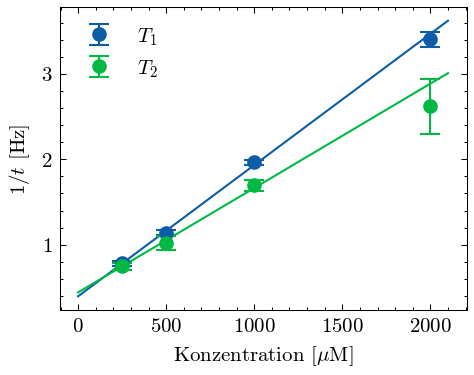

In [59]:
plt.figure()

plt.errorbar(concentrations, 1e3/nv(t1_11), 1e3*sd(t1_11)/nv(t1_11)**2,fmt='o',label='$T_1$',color='C0')
popt, pcov = curve_fit(linfit, concentrations, 1e3/nv(t1_11),sigma=1e3*sd(t1_11)/nv(t1_11)**2)
xl = np.linspace(0, 2100, 500)
print(f"m1 = {uf(popt[0],np.sqrt(np.diag(pcov))[0]):L}, c1 = {uf(popt[1],np.sqrt(np.diag(pcov))[1]):L}")
plt.plot(xl, linfit(xl, *popt),color='C0')

plt.errorbar(concentrations, 1e3/nv(t2_11), 1e3*sd(t2_11)/nv(t1_11)**2,fmt='o',label='$T_2$',color='C1')
popt, pcov = curve_fit(linfit, concentrations, 1e3/nv(t2_11),sigma=1e3*sd(t2_11)/nv(t1_11)**2)
print(f"m2 = {uf(popt[0],np.sqrt(np.diag(pcov))[0]):L}, c2 = {uf(popt[1],np.sqrt(np.diag(pcov))[1]):L}")
plt.plot(xl, linfit(xl, *popt),color='C1')

plt.legend()
plt.xlabel('Konzentration [$\mu$M]')
plt.ylabel('$1/t$ [Hz]')
plt.savefig(outdir+'11-relaxionszeiten.pdf')

In [60]:
print(r"\begin{tabular}{|l|l|l|}")
print(r"\hline")
print(r"\textbf{Konzentration} & \textbf{$T_1$} & \textbf{$T_2$} \\ \hline")
for c, t1, t2 in zip(concentrations, t1_11, t2_11):
    print(fr'\SI{{{c}}}{{\micro M}} & \SI{{{t1*1e-3:L}}}{{\s}} & \SI{{{t2*1e-3:L}}}{{\s}} \\ \hline')
print(r"\end{tabular}")

\begin{tabular}{|l|l|l|}
\hline
\textbf{Konzentration} & \textbf{$T_1$} & \textbf{$T_2$} \\ \hline
\SI{250}{\micro M} & \SI{1.28 \pm 0.05}{\s} & \SI{1.34 \pm 0.07}{\s} \\ \hline
\SI{500}{\micro M} & \SI{0.875 \pm 0.023}{\s} & \SI{0.98 \pm 0.06}{\s} \\ \hline
\SI{1000}{\micro M} & \SI{0.509 \pm 0.008}{\s} & \SI{0.590 \pm 0.017}{\s} \\ \hline
\SI{2000}{\micro M} & \SI{0.294 \pm 0.007}{\s} & \SI{0.382 \pm 0.028}{\s} \\ \hline
\end{tabular}


## Part 12

In [61]:
files12= files[8]
dat12 = data[8]
decim = dat12[::2]
magn = dat12[1::2]
files12

['data/kernspin/12/1D_Phantom_X/decim.txt',
 'data/kernspin/12/1D_Phantom_X/magnitude.txt',
 'data/kernspin/12/1D_Phantom_Y/decim.txt',
 'data/kernspin/12/1D_Phantom_Y/magnitude.txt',
 'data/kernspin/12/1D_Phantom_Z/decim.txt',
 'data/kernspin/12/1D_Phantom_Z/magnitude.txt']

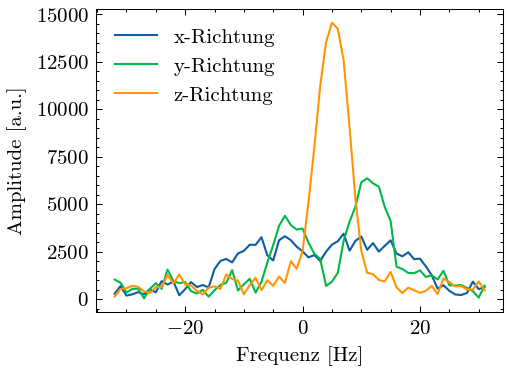

In [62]:
plt.figure()
for m, r  in zip(magn,['x','y','z']):
    plt.plot(m[0],m[1],label=f"{r}-Richtung")
plt.legend()
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude [a.u.]')
plt.savefig(outdir+'12-all_directions.pdf')

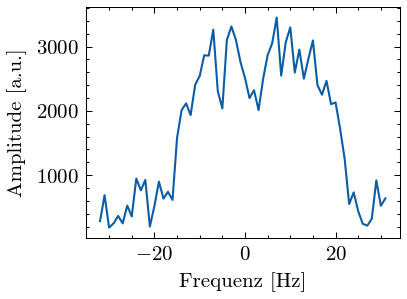

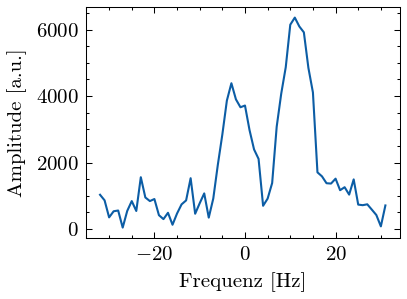

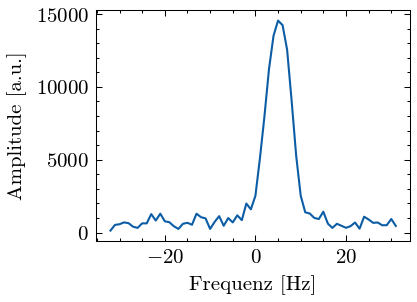

In [63]:
for m, r  in zip(magn,['x','y','z']):
    plt.figure(figsize=(2.7,2))
    plt.plot(m[0],m[1],label=f"{r}-Richtung")
    # plt.legend()
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('Amplitude [a.u.]')
    plt.savefig(outdir+f'12-{r}_direction.pdf')

## Part 13

In [64]:
files13 = !ls {datadir}13/*/*.txt
files13[1::2]

['data/kernspin/13/2D_Phantom_YZ_100pd_200et_small_fov/phase0.txt',
 'data/kernspin/13/2D_Phantom_YZ_2000pd_200et_small_fov/phase0.txt',
 'data/kernspin/13/2D_Phantom_YZ_5000pd_200et/phase0.txt',
 'data/kernspin/13/2D_Phantom_YZ_5000pd_55et_small_fov/phase0.txt',
 'data/kernspin/13/2D_Phantom_YZ_500pd_200et/phase0.txt',
 'data/kernspin/13/2D_Phantom_YZ_500pd_200et_small_fov/phase0.txt',
 'data/kernspin/13/2D_Phantom_YZ_500pd_55et_small_fov/phase0.txt']

In [65]:
dat13 = []
for f in files13:
    dat13.append(np.loadtxt(f))

In [66]:
for d in dat13[1::2]:
    # minimum value from matrix
    print(np.min(d),np.max(d))
# print(np.min(dat13[1::2]),np.max(dat13[1::2]))
min13, max13 = np.min(dat13[1::2]),np.max(dat13[1:4:2])
min13, max13

185.285 12405.8
522.604 46084.3
298.161 138924.0
497.369 25693.2
400.25 64875.3
269.676 31888.0
351.964 19402.3


(185.285, 46084.3)

46084.3


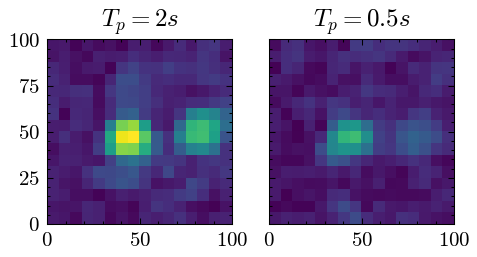

In [67]:
fig, ax = plt.subplots(1,2,sharey=True)
m=max(np.max(dat13[3]),np.max(dat13[11]))
print(m)
ax[0].imshow(dat13[3],extent=[0,100,0,100],aspect=100/100, vmin=min13, vmax=max13)
ax[0].set_title("$T_p=2s$")
ax[1].imshow(dat13[11],extent=[0,100,0,100],aspect=100/100, vmin=min13, vmax=max13)
ax[1].set_title("$T_p=0.5s$")
# plt.colorbar()
# ax[2].imshow(dat13[1])
plt.savefig(outdir+'13-100mm.pdf')
# colorbar(colormap="viridis")

138924.0


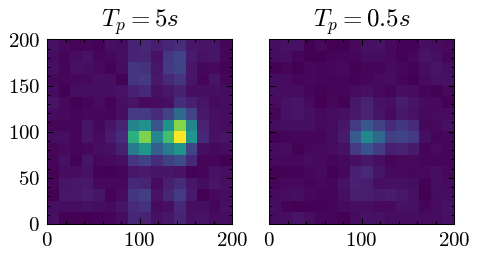

In [68]:
fig, ax = plt.subplots(1,2,sharey=True)
m=max(np.max(dat13[5]),np.max(dat13[9]))
print(m)
ax[0].imshow(dat13[5],extent=[0,200,0,200],aspect=100/100, vmin=min13, vmax=m)
ax[0].set_title("$T_p=5s$")
ax[1].imshow(dat13[9],extent=[0,200,0,200],aspect=100/100, vmin=min13, vmax=m)
ax[1].set_title("$T_p=0.5s$")

plt.savefig(outdir+'13-200mm.pdf')

25693.2


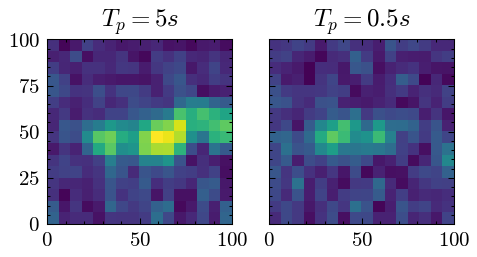

In [69]:
fig, ax = plt.subplots(1,2,sharey=True)
m=max(np.max(dat13[7]),np.max(dat13[13]))
print(m)
ax[0].imshow(dat13[7],extent=[0,100,0,100],aspect=100/100, vmin=min13, vmax=m)
ax[0].set_title("$T_p=5s$")
ax[1].imshow(dat13[13],extent=[0,100,0,100],aspect=100/100, vmin=min13, vmax=m)
ax[1].set_title("$T_p=0.5s$")
plt.savefig(outdir+'13-55et.pdf')

12405.8


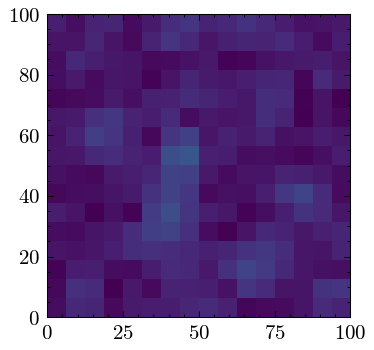

In [70]:
plt.figure()
plt.imshow(dat13[1],extent=[0,100,0,100],aspect=100/100, vmin=min13, vmax=max13)
print(dat13[1].max())
plt.savefig(outdir+'13-noisy.pdf')